# Using a VLM

## Install Dependencies

In [ ]:
!pip install langchain-openai==0.2.9

- Some installation to Use Ollama within Colab

## Setup Ollama :

In [ ]:
!sudo apt update
!sudo apt install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh

import threading
import subprocess
import time

def run_ollama_serve():
  subprocess.Popen(["ollama", "serve"])

thread = threading.Thread(target=run_ollama_serve)
thread.start()
time.sleep(5)

!ollama pull llama3.2-vision:11b
!ollama list

## Test the pipeline

- A system prompt is used here to customize the behavior of the VLM.

In [5]:
from langchain_core.prompts import ChatPromptTemplate
from langchain_openai import ChatOpenAI


system = """
Vous êtes un assistant puissant dans l'extraction d'informations a partir des factures francaises. \n

## Les Informations à extraire sont : \n

- Observer bien la facture et extraire les informations suivantes :  \n

   - Nom_facture : Un String, Le nom et le format(.jpg, .png, .jpeg) de l'image de la facture. \n
   - Fournisseur : Un String, Le nom du fournisseur de la facture. \n
   - date_facture : Un String, La date de la facture. \n
   - num_facture : Un String, L'identifiant de la facture, peut être numérique ou alphanumérique. \n
   - ttc : Un Float, Toutes Taxes Comprises. Il s'agit du prix final total payé par le client. Il inclut le prix Total HT et la Total TVA. \n
   - tt : Un Float, Le total hors taxes de la facture. \n
   - tva : Un Float, Le Total taxes. \n

## Structure de la réponse : \n

- Votre reponse doit être un dictionnaire python.

## Consignes : \n

- Les 3 prix TT,TTC,TVA doivent être numérique sans indication de devise. \n
- le nom de Fournisseur doit être en majuscule. \n
- Ne pas décrire la facture donnée seulement le dictionnaire Python.
"""


In [6]:
## Prompt Template
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        (
            "user",
            [
                 {
                    "type": "text",
                    "text": system,
                },
                {
                    "type": "image_url",
                    "image_url": {"url": "data:image/jpeg;base64,{image_data}"},
                }
            ],
        ),
    ]
)

VLM = ChatOpenAI(
    model="llama3.2-vision:11b",
    #temperature=0,
    api_key='ollama',
    base_url="http://localhost:11434/v1",
)

VLM_Extractor = prompt | VLM

def Run_VLM(InvoiceName,image_data):
    response = VLM_Extractor.invoke({"image_data": image_data,"InvoiceName": InvoiceName})
    return response

- You find the image used in the Notebooks folder in Github

In [7]:
import base64

def Image_to_base64(image_path):
    """
    Converts an image file to a Base64 encoded string.

    Args:
        image_path (str): The path to the image file.

    Returns:
        str: The Base64 encoded string of the image.
    """
    try:
        # Open the image file in binary mode
        with open(image_path, "rb") as image_file:
            # Read the file and encode it to Base64
            encoded_string = base64.b64encode(image_file.read()).decode("utf-8")
        return encoded_string
    except Exception as e:
        raise ValueError(f"An error occurred while converting the image: {e}")



- You find the "2.jpg" image in the Notebooks folde in Github.

In [9]:
# Example usage
image_path = "2.jpg"
base64_string = Image_to_base64(image_path)
print(base64_string)

/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQgJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAkhBngDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKAMUUUAFFFFABRRRQAUUUUAFFFFAB

In [10]:
response = Run_VLM("2.jpg",base64_string)
print(response.content)

Dictionnaire Python :

{ 'Nom_facture': 'facture_0030524040000075.jpg', 
'Fournisseur': 'OUTIDIS SARL',
'date_facture': '13/01/2023', 
'num_facture': '0030524040000075', 
'ttc': 586.80, 
'tt': 489.00, 
'tva': 97.8 }


# Using a Document Parser + LLM

## Docling

In [ ]:
!pip install docling==2.7.0

In [4]:
from docling_core.types.doc import PictureItem
from docling.datamodel.base_models import InputFormat
from docling.datamodel.pipeline_options import PdfPipelineOptions,EasyOcrOptions
from docling.document_converter import DocumentConverter,PdfFormatOption
import time

In [3]:
pipeline_options = PdfPipelineOptions()

pipeline_options.images_scale = 1
#pipeline_options.generate_page_images = True
#pipeline_options.generate_table_images = True
pipeline_options.do_ocr = True
pipeline_options.do_table_structure = True
pipeline_options.table_structure_options.do_cell_matching = True
ocr_options = EasyOcrOptions(force_full_page_ocr=True)
pipeline_options.ocr_options = ocr_options
pipeline_options.generate_picture_images = True

doc_converter = DocumentConverter(
    format_options={
        InputFormat.IMAGE: PdfFormatOption(pipeline_options=pipeline_options)
    }
)

In [34]:
def Run_Docling(Image_path):
    # Convert the image to Markdown
    start_time = time.time()

    result = doc_converter.convert(Image_path)

    end_time = time.time()

    Markdown = result.document.export_to_markdown()

    Inference_time = end_time - start_time
    return Markdown,Inference_time


import matplotlib.pyplot as plt
import cv2

def Show_image(image_path,size):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(size, size))
    plt.imshow(img_rgb)
    plt.axis('off')
    #plt.title(image_path)
    plt.show()


In [ ]:
# Example usage
Image_path = "2.jpg"
Show_image(Image_path,16)

In [ ]:
Markdown,Inference_time = Run_Docling(Image_path)
print("Inference Time (s) : ",Inference_time)
print(Markdown)

- You notice that the markdown dosn't countain the Name of the Supplier because Docling here mark it **<!-- image --**

- In the documentation we didn't find any parameter to adjust this behaviour. A possible solution is applying an OCR on these pictures then add the results to the Markdown.

### Setup Paddle

In [ ]:
## CPU :
#!pip install paddlepaddle -i https://pypi.tuna.tsinghua.edu.cn/simple
## GPU :
!pip install paddlepaddle-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple

In [ ]:
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

### Updated function

For every image detected in the document, the pipeline:

- Saves the image temporarily for processing.
- Sends the image to PaddleOCR for text extraction.
- Combines the extracted text from the image with the text content of the document itself.
- The extracted text is added at the beginning of the markdown.

In [38]:
from paddleocr import PaddleOCR
paddle_reader = PaddleOCR(use_angle_cls=True, lang='fr')

def Run_Paddle(Image_path):
    Start = time.time()
    result = paddle_reader.ocr(Image_path, det=True, rec=True)
    End = time.time()
    # Inference Time
    Time = End-Start
    # Process the result
    extracted_text = ''
    #print("Lenght Result: ",len(result))
    for line in result:
        if line is not None:
            for word in line:
                #print("Word: ",word)
                # Access the text part of the tuple
                extracted_text += word[1][0] + ' '  # Access the first element of the recognized text (the text itself)
            extracted_text += '\n'
    return extracted_text,Time


def Run_Docling_Updated(Image_path):
    # Convert the image to Markdown
    start_time = time.time()

    result = doc_converter.convert(Image_path)

    Markdown = result.document.export_to_markdown()
    # Itirate over all pictures in the document
    for element, _level in result.document.iterate_items():
        if isinstance(element, PictureItem):
            filename = "Last_Image.jpg"
            #element.image.pil_image.show()
            # Show the Image
            element.image.pil_image.save(filename)
            Show_image(filename,5)
            extracted_text,Time = Run_Paddle(filename)
            Markdown = extracted_text+"\n\n"+ Markdown
    end_time = time.time()
    Inference_time = end_time - start_time
    return Markdown,Inference_time


[2024/11/21 22:15:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, 

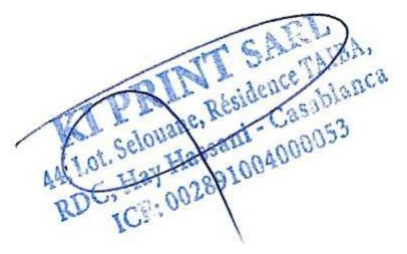

[2024/11/21 22:15:15] ppocr DEBUG: dt_boxes num : 2, elapsed : 0.05320000648498535
[2024/11/21 22:15:15] ppocr DEBUG: cls num  : 2, elapsed : 0.0187990665435791
[2024/11/21 22:15:15] ppocr DEBUG: rec_res num  : 2, elapsed : 0.017481327056884766


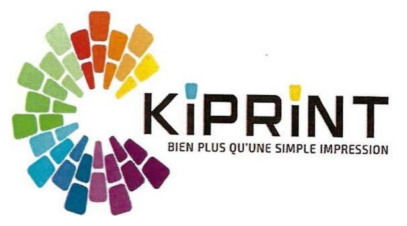

[2024/11/21 22:15:15] ppocr DEBUG: dt_boxes num : 3, elapsed : 0.02476644515991211
[2024/11/21 22:15:15] ppocr DEBUG: cls num  : 3, elapsed : 0.011451244354248047
[2024/11/21 22:15:15] ppocr DEBUG: rec_res num  : 3, elapsed : 0.011871337890625

 Inference Time (s) : 9.71914529800415

KIPRINTSAEE RDC,Hay Habsani-Casablanca ICF0028D1004000053 


KiPRiNT BIENPLUSOU'UNESIMPLE IMPRESSION 


<!-- image -->

FACTURE N'

FV230007

Date

13/01/2023

OUTIDIS SARL

003052404000075

MODE DE REGLEMENT

Page

| REFERENCE   | DESIGNATION                             | QTE   | PU. BRUT   | REM   | PU. NET   | Montant HT   |
|-------------|-----------------------------------------|-------|------------|-------|-----------|--------------|
| CV8.5/5KP   | GARTE VISITE 8.5*5.5 R/V                | 400   | 0.75       |       | 0.75      | 300.00       |
|             | 2 MODELS 200 EXEMPLAIRE                 |       |            |       |           |              |
| IMVIBRKP    | IMPRESSION SUR VINYL BRILLA

In [39]:
Markdown,Inference_time = Run_Docling_Updated(Image_path)
print(f"\n Inference Time (s) : {Inference_time}\n")
print(Markdown)

## Setup Ollama :

In [ ]:
!sudo apt update
!sudo apt install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh

import threading
import subprocess
import time

def run_ollama_serve():
  subprocess.Popen(["ollama", "serve"])

thread = threading.Thread(target=run_ollama_serve)
thread.start()
time.sleep(5)

!ollama pull qwen2.5:7b
!ollama list

## LLM

### Structered Output

**Structured output** in LangChain refers to generating text or data in a well-organized and predictable format. This is especially useful when extracting information from documents, performing question-answering tasks, or interacting with large language models (LLMs) where the results need to be machine-readable for further processing.



**Examples of Use Cases**

1. **Invoice Data Extraction**:
   Extract key details from an invoice such as the supplier name, invoice number, dates, and amounts.

   **Structured Output Format (JSON)**:
   ```json
   {
     "Supplier Name": "ABC Supplies",
     "Invoice Number": "12345",
     "Invoice Date": "2023-11-20",
     "Due Date": "2023-12-20",
     "Items": [
       {"Name": "Laptop", "Price": "$1000"},
       {"Name": "Mouse", "Price": "$50"}
     ],
     "Total Amount": "$1,050"
   }
   ```

---

2. **Resume Parsing**:
   Extract key information from a resume for HR processing.

   **Structured Output Format (JSON)**:
   ```json
   {
     "Name": "John Doe",
     "Contact Information": {
       "Email": "johndoe@example.com",
       "Phone": "+123456789"
     },
     "Education": [
       {"Degree": "BSc Computer Science", "Year": "2020", "Institution": "XYZ University"}
     ],
     "Experience": [
       {"Role": "Software Engineer", "Company": "TechCorp", "Years": "2020-2023"}
     ],
     "Skills": ["Python", "Machine Learning", "Docker"]
   }
   ```

---



**Why Use Structured Output in LangChain?**

- **Improved Automation**: Downstream systems (e.g., databases, workflows) can easily parse structured outputs.
- **Reliable Parsing**: Formats like JSON are easily parsed programmatically, avoiding ambiguity in freeform text.
- **Predictable Output**: Ensures uniformity, especially when processing multiple documents or handling repeated queries.
- **Ease of Integration**: Structured outputs can be directly fed into other tools (e.g., dashboards, APIs, or analysis pipelines).




<a href = "https://python.langchain.com/docs/how_to/structured_output/">More details in LangChain Docs<a>

### Install Dependencies

In [ ]:
!pip install langchain-openai==0.2.9

### Implementation

In [48]:
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field

class Extraction_Facture(BaseModel):
    """Les Informations principales à extraire a partir d'une facture française"""
    Nom_facture: str = Field("", description="Le nom et le format(.jpg, .png, .jpeg) de l'image de la facture")
    Fournisseur: str = Field("", description="Le nom du fournisseur de la facture")
    date_facture: str = Field("", description="La date de la facture")
    num_facture: str = Field("", description="L'identifiant de la facture, peut être numérique ou alphanumérique")
    ttc: float = Field(0.0, description="Toutes Taxes Comprises. Il s'agit du prix final total payé par le client. Il inclut le prix Total HT et la Total TVA.")
    tt: float = Field(0.0, description="Le total hors taxes de la facture")
    tva: float = Field(0.0, description="Le Total taxes")


system = """
Vous êtes un assistant puissant dans l'extraction d'informations a partir des factures francaises. \n
- Un OCR est appliqué sur l'image de la facture, lire le text et extraire les informations suivantes :  \n

- Fournisseur, Date_Facture, Num_Facture, TTC, TT, TVA \n
- Les 3 prix TT,TTC,TVA doivent être numérique sans indication de devise. \n
- le nom de Fournisseur doit être en majuscule. \n
"""

In [49]:
## Prompt Template
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Le text donné par OCR ici :\n {Parser_Output} \n le Nom de facture est : \n {Nom_facture} \n"),
    ]
)

In [50]:
from langchain_openai import ChatOpenAI
import pandas as pd
import time

LLM = ChatOpenAI(
    model="qwen2.5:7b",
    #temperature=0,
    api_key='ollama',
    base_url="http://localhost:11434/v1",
)
LLM_Structered = LLM.with_structured_output(Extraction_Facture)
LLM_Extractor = prompt | LLM_Structered

def Run_LLM(Parser_Output, Nom_facture):
    Input = {"Parser_Output":Parser_Output, "Nom_facture":Nom_facture}
    response = LLM_Extractor.invoke(Input)
    return response


In [ ]:
Image_path = "2.jpg"
Markdown,Inference_time = Run_Docling_Updated(Image_path)
print(f"\n Inference Time (s) : {Inference_time}\n")
print(Markdown)

In [56]:
Input = {"Parser_Output":Markdown, "Nom_facture":Image_path}
response = LLM_Extractor.invoke(Input)
response

Extraction_Facture(Nom_facture='2.jpg', Fournisseur='OUTIDIS SARL', date_facture='13/01/2023', num_facture='FV230007', ttc=586.8, tt=489.0, tva=97.8)

# Using an OCR + LLM

## Setup Ollama :

In [ ]:
!sudo apt update
!sudo apt install -y pciutils
!curl -fsSL https://ollama.com/install.sh | sh

import threading
import subprocess
import time

def run_ollama_serve():
  subprocess.Popen(["ollama", "serve"])

thread = threading.Thread(target=run_ollama_serve)
thread.start()
time.sleep(5)

!ollama pull qwen2.5:7b
!ollama list

## OCR

### Setup Paddle

In [57]:
## CPU :
#!pip install paddlepaddle -i https://pypi.tuna.tsinghua.edu.cn/simple
## GPU :
!pip install paddlepaddle-gpu -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple


In [58]:
!pip install "paddleocr>=2.0.1" # Recommend to use version 2.0.1+

### Paddle

In [59]:
from paddleocr import PaddleOCR
paddle_reader = PaddleOCR(use_angle_cls=True, lang='fr')

def Run_Paddle(Image_path):
    Start = time.time()
    result = paddle_reader.ocr(Image_path, det=True, rec=True)
    End = time.time()
    # Inference Time
    Time = End-Start
    # Process the result
    extracted_text = ''
    #print("Lenght Result: ",len(result))
    for line in result:
        if line is not None:
            for word in line:
                #print("Word: ",word)
                # Access the text part of the tuple
                extracted_text += word[1][0] + ' '  # Access the first element of the recognized text (the text itself)
            extracted_text += '\n'
    return extracted_text,Time

[2024/11/21 22:52:25] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, 

## LLM

### Install Dependencies

In [ ]:
!pip install langchain-openai==0.2.9

### Implementation

In [63]:
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field

class Extraction_Facture(BaseModel):
    """Les Informations principales à extraire a partir d'une facture française"""
    Nom_facture: str = Field("", description="Le nom et le format(.jpg, .png, .jpeg) de l'image de la facture")
    Fournisseur: str = Field("", description="Le nom du fournisseur de la facture")
    date_facture: str = Field("", description="La date de la facture")
    num_facture: str = Field("", description="L'identifiant de la facture, peut être numérique ou alphanumérique")
    ttc: float = Field(0.0, description="Toutes Taxes Comprises. Il s'agit du prix final total payé par le client. Il inclut le prix Total HT et la Total TVA.")
    tt: float = Field(0.0, description="Le total hors taxes de la facture")
    tva: float = Field(0.0, description="Le Total taxes")


system = """
Vous êtes un assistant puissant dans l'extraction d'informations a partir des factures francaises. \n
- Un OCR est appliqué sur l'image de la facture, lire le text et extraire les informations suivantes :  \n

- Fournisseur, Date_Facture, Num_Facture, TTC, TT, TVA \n
- Les 3 prix TT,TTC,TVA doivent être numérique sans indication de devise. \n
- le nom de Fournisseur doit être en majuscule. \n
"""

In [64]:
## Prompt Template
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Le text donné par OCR ici :\n {OCR_Output} \n le Nom de facture est : \n {Nom_facture} \n"),
    ]
)

In [65]:
from langchain_openai import ChatOpenAI
import pandas as pd
import time

LLM = ChatOpenAI(
    model="qwen2.5:7b",
    #temperature=0,
    api_key='ollama',
    base_url="http://localhost:11434/v1",
)
LLM_Structered = LLM.with_structured_output(Extraction_Facture)
LLM_Extractor = prompt | LLM_Structered

def Run_LLM(Parser_Output, Nom_facture):
    Input = {"OCR_Output":OCR_Output, "Nom_facture":Nom_facture}
    response = LLM_Extractor.invoke(Input)
    return response


In [66]:
Image_path = "2.jpg"
OCR_Output,Inference_time = Run_Paddle(Image_path)
print(f"\n Inference Time (s) : {Inference_time}\n")
print(OCR_Output)

[2024/11/21 22:53:51] ppocr DEBUG: dt_boxes num : 54, elapsed : 0.08028697967529297
[2024/11/21 22:53:51] ppocr DEBUG: cls num  : 54, elapsed : 0.08476042747497559
[2024/11/21 22:53:51] ppocr DEBUG: rec_res num  : 54, elapsed : 0.1887810230255127

 Inference Time (s) : 0.40481019020080566

FACTURE N°: FV230007 KiPRiNT Date  Délai Livraison Validité de I'offre 13/01/2023 BIEN PLUS QU'UNE SIMPLE IMPRESSION OUTIDIS SARL 003052404000075 MODE DE REGLEMENT: Page REFERENCE DESIGNATION QTE P.U. BRUT REM P.U.NET Montant HT CV8.5/5KP CARTE VISITE 8.5*5.5 R/V 400 0.75 0.75 300.00 2 MODELS * 200 EXEMPLAIRE IMVIBRKP IMPRESSION SUR VINYL BRILLANT 40*264 CM 1 105.00 105.00 105.00 ILOTKP CARTE 15*15 SUR PAPIER SPECIAL 12 7.00 7.00 84.00 ue C& TC TOTAL HT TOTAL TVA TOTAL T.T.C. 489.00 97.80 586.80 ARRETEE LA PRESENTE FACTURE A LA SOMME DE : Cinq cent quatre-vingt six Dirhams, quatre-vingts Cts Le service commercial.  44, résidence taiba, lotissement salwan, oulfa, Casablanca - Maroc RC : 514927-N°Paten

In [67]:
Input = {"OCR_Output":OCR_Output, "Nom_facture":Image_path}
response = LLM_Extractor.invoke(Input)
response

Extraction_Facture(Nom_facture='2.jpg', Fournisseur='OUTIDIS SARL', date_facture='13/01/2023', num_facture='FV230007', ttc=586.8, tt=489.0, tva=97.8)